# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

In [25]:
import pandas as pd
import numpy as np

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [1]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [26]:
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [4]:
# Ваш код здесь
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
# Ваш код здесь
adver_data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
adver_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [27]:
X = adver_data.iloc[:, 0:3].values
y = adver_data.iloc[:, 3].values

In [28]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение.** 


**Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [29]:
X.mean(axis=0), X.std(axis = 0)

(array([147.0425,  23.264 ,  30.554 ]),
 array([85.63933176, 14.80964564, 21.72410606]))

In [30]:
means, stds = X.mean(axis = 0), X.std(axis = 0)

In [31]:
X = (X - means) / stds

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [37]:
ones = np.ones((1, len(X))).reshape(-1, 1)
ones.shape 

(200, 1)

In [38]:
X = np.hstack((X, ones)) # Ваш код здесь
X.shape

(200, 4)

In [39]:
X[1:5]

array([[-1.19737623,  1.08280781,  0.66957876,  1.        ],
       [-1.51615499,  1.52846331,  1.78354865,  1.        ],
       [ 0.05204968,  1.21785493,  1.28640506,  1.        ],
       [ 0.3941822 , -0.84161366,  1.28180188,  1.        ]])

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [40]:
def mserror(y, y_pred):
    # Ваш код здесь
    return np.sum((y_pred - y)**2) / y.shape[0]

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [98]:
answer1 = mserror(y, np.median(y))
print(answer1)
write_answer_to_file(answer1, '1.txt')

28.34575


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [41]:
def normal_equation(X, y):
    # Ваш код здесь
    return np.linalg.pinv(X).dot(y)  

In [42]:
w = normal_equation(X, y)
w

array([ 3.91925365,  2.79206274, -0.02253861, 14.0225    ])

In [49]:
X.dot(w)

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

In [54]:
X.dot(w).round(1)

array([20.5, 12.3, 12.3, 17.6, 13.2, 12.5, 11.7, 12.1,  3.7, 12.6,  7. ,
       17.3, 10.6,  8.8, 18.4, 20.8, 12.8, 23.2, 10. , 14.2, 18.1, 14.7,
        6.5, 16.5,  8.1, 15.6, 15. , 17.1, 19.4,  9.1, 21.6, 11.3,  7.6,
       18.9,  7.6, 17. , 23.4, 15.6,  9.9, 20.4, 16.4, 17.3, 21.6, 14. ,
        8.9, 15.2,  8.9, 21.7, 16.3,  8.2, 12.6,  9.3, 20.7, 19.9, 20.4,
       21.3,  8.5, 12.8, 21.9, 18.1,  5.7, 22.9, 16.8, 13.2, 17. ,  7.8,
        9. , 12. , 19. , 21.1, 17.8, 10.6, 10.4,  9.9, 17.3, 11.9,  4.5,
       13.8,  8.8,  9.7, 11.4, 14.6, 10.2, 14.4, 20.8, 15.2, 11.6, 15.6,
       11.7, 16.9, 10. ,  4.5, 19.2, 21.2, 10.5, 16.3, 12.6, 15.3, 24.1,
       16.9, 13.9, 23.2, 17.6, 14.8, 20.3, 17.9,  6.1,  7.1,  3.6, 19.7,
       14.8, 21.1, 13.9, 16.4, 15.3, 12.9, 12. ,  6.6, 15.6,  6.8, 14.4,
        7.8, 13.6, 15.1, 19.5,  9.1, 10.6,  6.6, 22.3,  7.9, 10.4, 15.6,
        8.4, 19.3, 11.8, 14. , 11.5, 20.9,  9.8, 19.7,  9.5, 18.4, 19.2,
        8.8, 10.1,  9.7, 15.3, 23.3, 12.3,  9.8, 18

In [52]:
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [177]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[  3.91925365   2.79206274  -0.02253861  14.0225    ]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [178]:
answer2 =  np.array([0,0,0,1]).dot(w)
print(answer2)
write_answer_to_file(answer2, '2.txt')

14.0225


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [56]:
def linear_prediction(X, w):
    # Ваш код здесь
    return X.dot(w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [147]:
answer3 = mserror(y, linear_prediction(X, norm_eq_weights))
print(answer3)
write_answer_to_file(answer3, '3.txt')

2.78412631451


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [92]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    grad0 = 2/y.shape[0] * X[train_ind, 0] * (X[train_ind, :].dot(w) - y[train_ind])
    grad1 = 2/y.shape[0] * X[train_ind, 1] * (X[train_ind, :].dot(w) - y[train_ind])
    grad2 = 2/y.shape[0] * X[train_ind, 2] * (X[train_ind, :].dot(w) - y[train_ind])
    grad3 = 2/y.shape[0] * X[train_ind, 3] * (X[train_ind, :].dot(w) - y[train_ind])
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

In [108]:
def stochastic_gradient_step_general(X, y, w, train_ind, eta=0.01):
    grad = np.arange(0, len(w), dtype=float)
    
    for w_id in range(len(w)):
#       частная производная по w_id
        derivative = 2/y.shape[0] * X[train_ind, w_id] * (X[train_ind, :].dot(w) - y[train_ind])
        grad[w_id] = derivative
    
    return w - eta * grad

In [99]:
stochastic_gradient_step(X,y,np.array([0,0,0,0]),40)

array([ 1.07496694e-03, -1.08053902e-04,  7.99277998e-05,  1.66000000e-03])

In [100]:
stochastic_gradient_step_general(X,y,np.array([0,0,0,0]),40)

array([ 1.07496694e-03, -1.08053902e-04,  7.99277998e-05,  1.66000000e-03])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [101]:
from matplotlib import pyplot as plt

In [109]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        w = stochastic_gradient_step_general(X, y, w, random_ind, eta)
        prediction = linear_prediction(X, w)
        errors.append(mserror(y, prediction))
        
        iter_num += 1
        
    return w, errors

Напишу эту функцию целиком, без вспомогательных функций, чтобы было понятнее. Как оказалось, лучше не трогать расстояние между векторами весов и просто давать как можно больше итераций. А там смотреть на графике ошибок, сходится ли алгоритм

In [110]:
def stochastic_gradient_descent_full(X, y, w_init, eta = 0.01, max_iter = 10000, min_weight_dist = 1e-8, 
                                     seed = 42, verbose = False):
    errors = []
    
    weight_dist = np.inf
    
    w = w_init
    
    item_num = 0
    
    np.random.seed(seed)
    
    while weight_dist > min_weight_dist and item_num < max_iter:
        if verbose:
            print(weight_dist)
        random_ind = np.random.randint(X.shape[0])
        
        grad = np.arange(0, len(w), dtype = float)
        
        for i in range(len(w)):
            grad_i = 2/y.shape[0] * X[random_ind, i] * (X[random_ind, :].dot(w) - y[random_ind])
            grad[i] = grad_i
    
#       новые веса
        new_w = eta * grad
#       расстояние между весами
        weight_dist = np.sum((new_w - w))**2 / y.shape[0]
#       обновляем веса
        w = w - new_w
        
        error = np.sum((X.dot(w) - y)**2) / y.shape[0]
        errors.append(error)

        item_num += 1
        
    return w, errors
        

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [111]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.array([0,0,0,0]), max_iter= 10**5)

CPU times: user 3.13 s, sys: 43.9 ms, total: 3.17 s
Wall time: 3.22 s


In [112]:
%%time
stoch_grad_desc_weights_full, stoch_errors_by_iter_full = stochastic_gradient_descent_full(X, y, np.array([0,0,0,0]), max_iter= 10**5)

CPU times: user 3.58 s, sys: 32 ms, total: 3.61 s
Wall time: 3.63 s


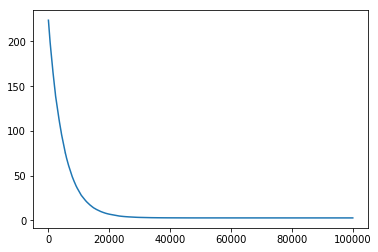

In [113]:
%matplotlib inline
plt.plot(stoch_errors_by_iter)

Дошел до гранцы расстояния между векторами весов (EDIT: нет, я просто был тупым и неправильно написал фукнцию расстояния для весов, теперь все ок)

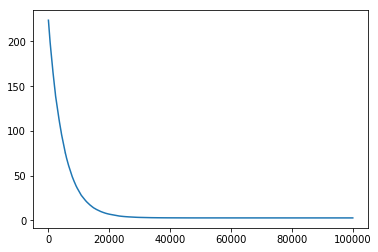

In [114]:
plt.plot(stoch_errors_by_iter_full)

**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

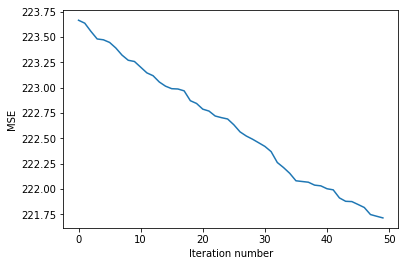

In [118]:
%pylab inline
plt.plot(range(50), stoch_errors_by_iter[:50]);
plt.xlabel('Iteration number')
plt.ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

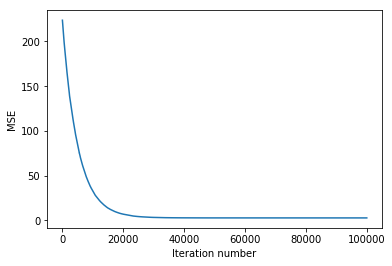

In [119]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [120]:
stoch_grad_desc_weights

array([ 3.94909052,  2.76783147, -0.04537642, 14.01961682])

In [121]:
stoch_grad_desc_weights_full

array([ 3.94909052,  2.76783147, -0.04537642, 14.01961682])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [122]:
stoch_errors_by_iter[-1]

2.786369048218392

In [123]:
stoch_errors_by_iter_full[-1]

2.786369048218392

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [254]:
answer4 = stoch_errors_by_iter[-1]
print(answer4)
write_answer_to_file(answer4, '4.txt')

2.78636904822


**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**